In [ ]:
import numpy as np

## Define parameters

# Time period
tmax = 100          # Duration of the observation period (years)

# Aquifer
M = 30             # Thickness of the aquifer (m)
phi = 0.4          # Porosity of the aquifer
rho_S = 1900       # Density of the solid matrix (kg/m³)
c_S = 850          # Heat capacity of the solid matrix (J/kg/K)
lambda_S = 3.0     # Thermal conductivity (W/m/K)


kf = 1e-12 * 1000 * 9.81 / 1e-3  # Hydraulic conductivity (m/s)

# Fluid
rho_F = 1500
c_F = 4200

# Doublet
a = 450             # Half the distance between injection and extraction wells (m)
Q = 0.03            # Injection rate = extraction rate (m³/s)

# Groundwater
v0 = 0.0            # Groundwater flow velocity
#v0 = 0.000000002    # Groundwater flow velocity

alpha = np.pi/2     # Direction of groundwater flow

# Constants
a2s = 365*24*3600   # Conversion from seconds to years

# Calculate breakthrough time
rho_A_c_A = phi * rho_F * c_F + (1 - phi) * rho_S * c_S
G = rho_A_c_A / (rho_F * c_F)
tb = G * 4 * np.pi * M * a * a / (3 * Q) / a2s
tmax = 3*tb/G # Time period for streamline integration

vz = 2 * lambda_S / M / rho_A_c_A

print(f"The breakthrough time is {tb:.2f} years.")
print(f"Expected pressure difference in the wells for undisturbed groundwater flow {2*a*v0/kf:.2f} meters")

t = tmax*a2s
L = np.sqrt(2*t*lambda_S/rho_A_c_A)
print(f"The radius of influence in the aquitard is {L:.2f} m")

Die Durchbruchszeit beträgt 14.90 Jahre.
Erwartete Druckdifferenz in den Bohrungen bei ungestörter Grundwasserströmung 0.00 Meter
Der Einflussbereich im Aquitard beträgt 66.15m


Note: the solution for heat transfer does not consider heat exchange with the aquitard.


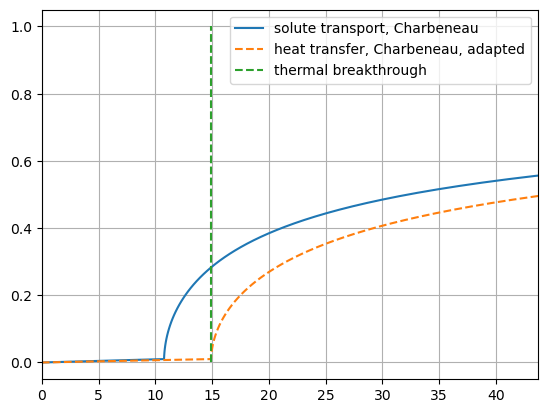

In [ ]:
from scipy.special import erfc
import matplotlib.pyplot as plt

# Formula from R.J. Charbeneau: Groundwater Hydraulics and Pollutant Transport, 2000
# p. 318 - Formula 6.4.11

F = np.linspace(1e-20, 1, 100)
tf = 4 *np.pi * phi * M * a * a / Q * (1 - np.pi * F / np.tan(np.pi * F)) / (np.sin(np.pi * F) ** 2) / a2s

tb = G * 4 * np.pi * M * a * a / (3 * Q) / a2s

tf2 = G * 4 *np.pi * M * a * a / (3 * Q) / a2s

tau2 = G*tf/phi

print("Note: the solution for heat transfer does not consider heat exchange with the aquitard.")

plt.plot(tf, F, label="solute transport, Charbeneau")
plt.plot(tau2, F, '--', label="heat transfer, Charbeneau, adapted")
plt.plot([tb, tb], [0, 1], '--', label="thermal breakthrough")

plt.grid()
plt.xlim((0, tmax*G-1))
plt.legend()
plt.show()

